### Задание 

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

1. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
2. Разделите данные на выборку для обучения и тестирования
3. Постройте модель LDA
4. Визуализируйте предсказания для тестовой выборки и центры классов
5. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
6. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [4]:
iris = load_iris()

In [13]:
data = pd.DataFrame(iris.data, columns=iris.feature_names) # Возьмите датасет с цветками iris’а 
data['variety'] = iris.target

In [34]:
# Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
data_sepal = data[['sepal length (cm)', 'sepal width (cm)', 'variety']] 

In [32]:
data_sepal.head()

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [21]:
# Разделите данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data_sepal, test_size=0.2) 

In [22]:
y_train, y_test = data_train['variety'], data_test['variety']
del data_train['variety']
del data_test['variety']

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(data_train, y_train) # Постройте модель LDA

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [110]:
# оценка модели: не удачная модель)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(data_test))

0.6666666666666666

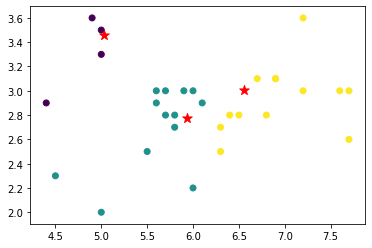

In [38]:
# Визуализируйте предсказания для тестовой выборки и центры классов
plt.scatter(data_test['sepal length (cm)'], data_test['sepal width (cm)'], c=lda.predict(data_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=100, marker='*')
plt.show()

In [52]:
# Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
data_sepal_ = data[['sepal length (cm)', 'sepal width (cm)']]


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_sepal_scaled = scaler.fit_transform(data_sepal_) # нормализация данных


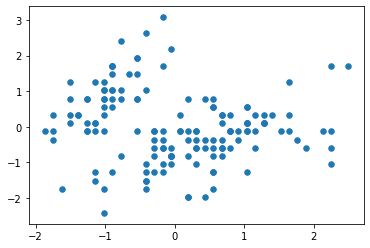

In [53]:
plt.scatter(data_sepal_scaled[:, 0], data_sepal_scaled[:, 1],cmap='autumn', s=30)

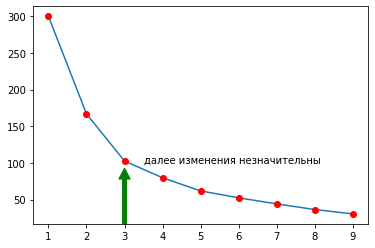

In [108]:
# Подберите оптимальное число кластеров для алгоритма kmeans 
from sklearn.cluster import KMeans
k_inertia = []
ks = range(1,10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_sepal_scaled)
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.text(3.5, 100, 'далее изменения незначительны',
        rotation = 0,
        fontsize = 10)
plt.arrow(3, 0, 0, 78,
        color = 'g',
         width = 0.1,
         head_length = 15)

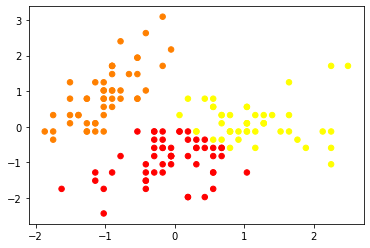

In [109]:
# визуализируйте полученную кластеризацию
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data_sepal_scaled)

plt.scatter(data_sepal_scaled[:, 0], data_sepal_scaled[:, 1],cmap='autumn', c=clusters, s=30)

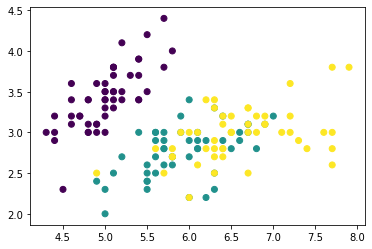

In [64]:
plt.scatter(data_sepal['sepal length (cm)'], data_sepal['sepal width (cm)'], c=data_sepal['variety'])